In [13]:
import pandas as pd

In [14]:

df = pd.read_csv('recons-sab-bma.csv')


In [15]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCTCCGTTGTATCTA...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGGG...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAAATGGCGGAGTAAGCGCGT...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGCTGAGCGCCATTTTGTTTA...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...


In [16]:
from tqdm import tqdm


In [17]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [18]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [19]:
import difflib


In [20]:
def print_diff(ref_strand, recons_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, recons_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = recons_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]


            
        
    #print('')


In [21]:
# AGCT
# TAGC

# SM: (0, _ -> T), (4, _ -> T)
# Prof: (0, 1, 2, 3)

count_pos = [0] * 5
def print_diff2(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1
print_diff2("AGCT", "TAGC")
print(count_pos)

ref_strand = "AGCT"
recons_strand = "TAGC"
a = 0
b = 0
for match in difflib.SequenceMatcher(None, ref_strand, recons_strand, autojunk=False).get_matching_blocks():
    was = ref_strand[a:match.a]
    now = recons_strand[b:match.b]

    a = match.a + match.size
    b = match.b + match.size

    print(match, was, now, match.a)


    if was == '' and now == '':
        pass
    else:
        pass
        # print('{}|{}'.format(was, now), end=', ')
        # pairs += [(was, now, match.a)]
        # pairs_no_pos += [(was, now)]


[1, 1, 1, 1, 0]
Match(a=0, b=1, size=3)  T 0
Match(a=4, b=4, size=0) T  4


100%|██████████| 10000/10000 [00:00<00:00, 151381.75it/s]

[21, 88, 99, 104, 122, 138, 183, 186, 202, 208, 227, 257, 268, 302, 316, 349, 363, 387, 384, 427, 462, 478, 501, 524, 579, 602, 591, 619, 640, 694, 695, 718, 730, 797, 822, 830, 873, 888, 912, 965, 1003, 989, 1047, 1042, 1089, 1072, 1090, 1149, 1181, 1177, 1245, 1199, 1265, 1330, 1346, 2073, 2018, 2001, 1974, 1980, 1921, 1889, 1898, 1854, 1850, 1771, 1744, 1784, 1746, 1701, 1682, 1663, 1606, 1603, 1589, 1608, 1555, 1525, 1514, 1486, 1500, 1444, 1427, 1397, 1398, 1379, 1324, 1333, 1310, 1269, 1256, 1245, 1250, 1227, 1212, 1186, 1155, 1145, 1121, 1037, 1072, 1074, 1088, 1050, 1016, 1034, 1078, 1064, 953, 743, 0]


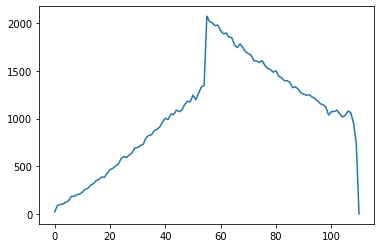

In [22]:
strand_len = 110
count_pos = [0] * (strand_len + 1)

def print_diff2(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff2(ref_strands[i], noisy_strands[i])

import matplotlib.pyplot as plt
plt.plot(range(strand_len + 1), count_pos)
print(count_pos)


In [23]:
import numpy as np


In [24]:
pairs = []
pairs_no_pos = []
for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])

100%|██████████| 10000/10000 [00:04<00:00, 2054.64it/s]


In [25]:
subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

In [26]:
for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)

GAT ->  6
TTG ->  6
 -> GAG 6
G -> AT 6
CAT ->  6
T -> GG 6
 -> TGT 6
GC -> AA 6
 -> AAT 6
 -> ACA 6
TGT ->  6
C -> GA 6
TCG ->  6
TAC ->  6
TCC ->  7
GT -> AA 7
GTA ->  7
 -> CCC 7
TGG ->  7
TC -> G 7
T -> CG 7
CTT ->  7
CGG ->  7
CGT ->  7
GTC ->  8
 -> CAA 8
GT -> AC 8
AA ->  8
 -> AAC 8
ATT ->  8
TAT ->  8
G -> CA 8
 -> ACG 9
TG -> AC 9
T -> GA 10
T -> CC 10
C -> AA 10
TG -> C 11
GC -> A 11
G -> CC 11
T -> CA 12
T -> GC 12
TGC ->  13
CT -> A 13
G -> AA 13
TT -> A 13
CG -> A 13
G -> AC 14
GT -> C 15
T -> AG 16
TC -> A 16
GT -> A 17
TG -> A 17
T -> AC 18
T -> AA 19
CC ->  20
AC ->  21
AG ->  31
 -> TA 32
CA ->  34
 -> GT 34
 -> GG 35
GG ->  37
GA ->  37
 -> TG 37
GC ->  39
 -> GC 39
 -> TT 39
TA ->  39
 -> CT 40
 -> CG 40
CG ->  41
 -> AC 41
 -> TC 41
TT ->  46
 -> AT 49
AT ->  50
 -> GA 50
 -> CC 56
CT ->  57
A -> T 60
 -> AG 60
 -> CA 65
C -> T 66
 -> AA 66
TC ->  68
GT ->  69
A -> G 74
G -> T 75
TG ->  78
C -> G 80
A -> C 87
G -> C 300
G -> A 319
T -> G 354
T -> A 397
C -> A 401
T

In [27]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [28]:
for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)


C ->  @ 49 6
 -> C @ 33 6
 -> A @ 89 6
C ->  @ 38 6
 -> C @ 32 6
G ->  @ 4 6
 -> A @ 88 6
 -> A @ 87 6
 -> A @ 41 6
C ->  @ 40 6
C ->  @ 36 6
C ->  @ 9 6
G ->  @ 43 6
 -> A @ 84 6
C ->  @ 92 6
 -> A @ 73 6
C -> A @ 88 6
C -> A @ 81 6
 -> A @ 74 6
 -> A @ 30 6
 -> C @ 64 6
A ->  @ 94 6
C ->  @ 12 6
C -> A @ 67 6
 -> A @ 92 6
C ->  @ 93 6
C ->  @ 24 6
C ->  @ 72 6
C ->  @ 69 6
C ->  @ 13 6
 -> A @ 46 6
C ->  @ 63 6
C -> A @ 32 6
G ->  @ 20 6
C ->  @ 59 6
C ->  @ 20 6
G ->  @ 3 6
C ->  @ 50 6
 -> A @ 35 6
 -> C @ 20 6
 -> AT @ 56 6
 -> A @ 34 6
C ->  @ 34 6
C -> A @ 57 6
G ->  @ 15 6
 -> C @ 103 6
C ->  @ 17 6
 -> C @ 30 6
C ->  @ 91 6
T -> G @ 65 6
T -> C @ 66 6
T -> A @ 50 6
T -> A @ 53 6
T -> C @ 95 6
T -> A @ 55 6
T -> C @ 91 6
 -> GAG @ 55 6
T -> C @ 79 6
T ->  @ 7 6
A ->  @ 105 6
T -> C @ 73 6
T -> C @ 71 6
T -> C @ 68 6
T ->  @ 95 6
T -> C @ 63 6
G ->  @ 64 6
T -> C @ 61 6
G ->  @ 72 6
T ->  @ 75 6
G -> A @ 55 6
 -> CA @ 56 6
A ->  @ 59 6
T -> G @ 70 6
T -> G @ 56 6
T ->  @ 9 6
T -

In [29]:
import matplotlib.pyplot as plt

In [30]:
strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

[34, 59, 59, 34, 25, 33, 32, 35, 31, 40, 43, 40, 51, 40, 54, 43, 51, 44, 47, 46, 55, 68, 62, 56, 54, 67, 59, 62, 61, 76, 68, 63, 91, 63, 79, 103, 92, 68, 94, 96, 106, 94, 97, 88, 87, 102, 86, 98, 104, 112, 115, 120, 166, 261, 438, 1995, 875, 360, 155, 121, 106, 121, 113, 111, 116, 107, 109, 97, 86, 103, 85, 101, 105, 101, 72, 82, 108, 85, 101, 89, 77, 78, 61, 72, 78, 80, 74, 80, 74, 66, 58, 72, 72, 58, 63, 71, 68, 52, 80, 59, 44, 38, 58, 56, 53, 51, 63, 67, 84, 484, 1121]


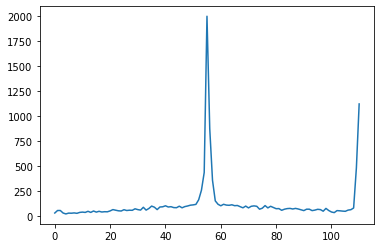

In [31]:
plt.plot(range(strand_len + 1), pos_counts)

In [32]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

print(pos_map['_ -> T'])

[1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 4, 3, 1, 1, 0, 0, 1, 1, 2, 4, 3, 2, 0, 0, 1, 2, 0, 0, 2, 3, 0, 4, 3, 1, 1, 0, 1, 1, 0, 3, 4, 0, 1, 1, 3, 1, 2, 2, 4, 2, 1, 1, 6, 27, 40, 277, 69, 21, 4, 4, 1, 0, 1, 5, 3, 2, 2, 2, 4, 1, 2, 1, 3, 1, 2, 3, 2, 4, 3, 4, 3, 0, 2, 0, 3, 2, 1, 3, 0, 0, 0, 0, 3, 1, 1, 2, 1, 0, 3, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 49, 12]


In [33]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


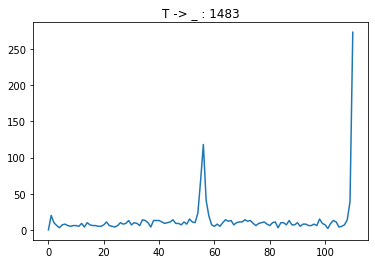

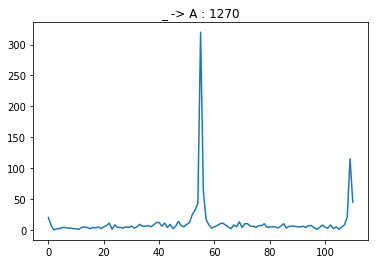

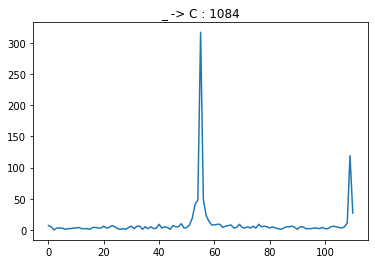

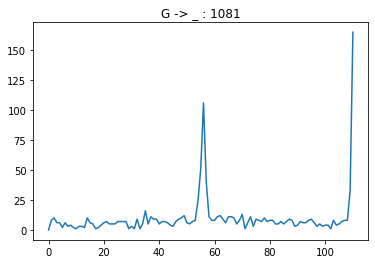

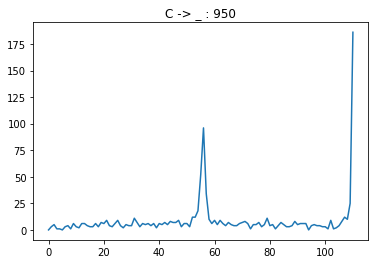

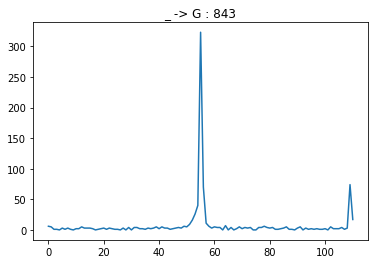

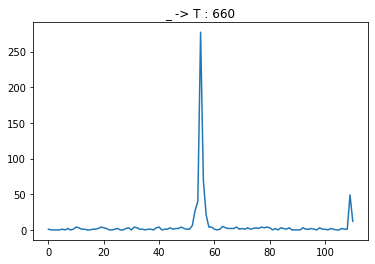

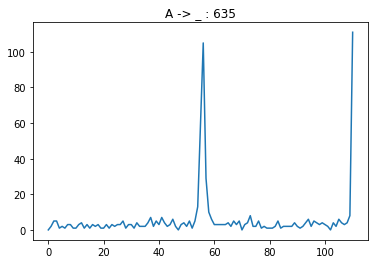

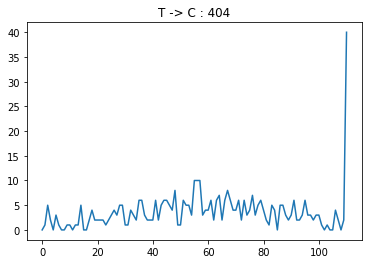

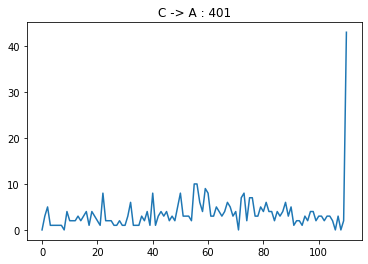

In [34]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    plt.title(f'{key} : {count}')
    plt.plot(range(strand_len + 1), pos_map[key])

In [35]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)